In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sb

In [170]:
import pandas as pd
# Read the data from the file "risk-train.txt" into a DataFrame
trade_df = pd.read_table("risk-train.txt")
# Display the first few rows of the DataFrame using the head() function
trade_df.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49917,no,yes,no,1/17/1973,yes,yes,check,?,5.2006,...,no,no,no,8,yes,0,0.00,?,?,?
1,49919,no,yes,yes,12/8/1970,no,no,credit_card,Visa,12.2007,...,yes,no,no,13,yes,0,0.00,?,?,?
2,49923,no,yes,no,4/3/1972,yes,no,check,?,12.2007,...,no,no,no,3,yes,0,0.00,?,?,?
3,49924,no,no,yes,8/1/1966,yes,no,check,?,1.2007,...,no,no,no,11,no,4,75.72,5/12/2002,0,0
4,49927,no,yes,yes,12/21/1969,yes,no,credit_card,Eurocard,12.2006,...,no,no,no,16,yes,0,0.00,?,?,?


# Data Preprocessing

### Dealing with irrelevant columns

In [171]:
# List of column names that are considered irrelevant
irrelevant_columns = ['B_EMAIL', 'B_TELEFON', 'WEEKDAY_ORDER', 'TIME_ORDER',
                      'ANUMMER_01', 'ANUMMER_02', 'ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05',
                      'ANUMMER_06', 'ANUMMER_07', 'ANUMMER_08', 'ANUMMER_09', 'ANUMMER_10',
                      'B_BIRTHDATE', 'FLAG_NEWSLETTER', 'FAIL_LPLZORTMATCH', 'FAIL_RPLZ',
                      'FAIL_RORT', 'FAIL_RPLZORTMATCH', 'ORDER_ID', 'FLAG_LRIDENTISCH']

# Iterating over each column name in the list of irrelevant columns
# Removing the column from the DataFrame
for column in irrelevant_columns:
    trade_df.drop(column, axis=1, inplace=True)

### Dealing with Null/Missing Values

In [172]:
# Replace all occurrences of '?' with NaN (missing value) in the DataFrame 'trade_df'
# By replacing '?' with NaN, we are standardizing missing values across the DataFrame
# This facilitates subsequent data analysis and processing
trade_df.replace('?', np.nan, inplace=True)

### Visualizing the distribution for null values accross the database

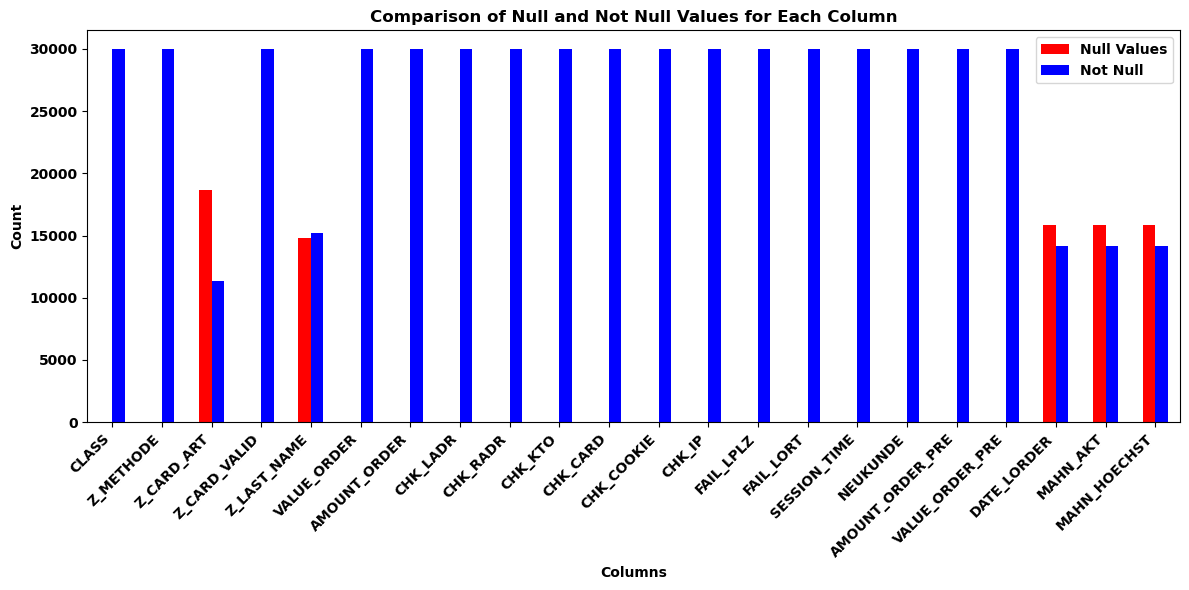

In [173]:
# Count the number of null values for each column
null_counts = trade_df.isnull().sum()

# Count the number of not-null values for each column
not_null_counts = trade_df.notnull().sum()

# Combine null and not-null counts into a single DataFrame
comparison_df = pd.DataFrame({'Null Values': null_counts, 'Not Null': not_null_counts})

# Plot the comparison using a bar chart
comparison_df.plot(kind='bar', figsize=(12, 6), color=['red', 'blue'])
plt.title('Comparison of Null and Not Null Values for Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Justification for Null values
### Z_CARD_ART Null Values

If **Z_CARD_ART has a null value**, that means that the **Z_METHODE ("The Method of payment") is one of the not a card method**
i.e it is either check or debit_note

In [174]:
# Code to Verify above statements
# Calculating Total Null values
print("Total Number of Null values in Z_CARD_ART:", trade_df['Z_CARD_ART'].isnull().sum())

# Calculating rows where the Z_METHODE is check
check_rows_for_check = trade_df[trade_df['Z_METHODE'] == 'check']
# Calculating rows where the Z_METHODE is debit_note
check_rows_for_debit_note = trade_df[trade_df['Z_METHODE'] == 'debit_note']

# Comparing the Total NULL Values with the sum of rows for check and debit_note Z_METHODE
print("Total Null Values for Z_CARD_ART when the Z_METHODE is not a card method i.e credit or debit_note:", 
      check_rows_for_check["Z_CARD_ART"].isnull().sum() + 
      check_rows_for_debit_note["Z_CARD_ART"].isnull().sum())
print("Since its equal, we don't need to drop the Z_CARD_ART column as its null values are justified")

Total Number of Null values in Z_CARD_ART: 18654
Total Null Values for Z_CARD_ART when the Z_METHODE is not a card method i.e credit or debit_note: 18654
Since its equal, we don't need to drop the Z_CARD_ART column as its null values are justified


### Transforming the null values to "No card"

In [175]:
# Replacing the Null-values in Z_CARD_ART as "No card"
trade_df["Z_CARD_ART"].fillna("No card", inplace=True)

### Z_LAST_NAME Null Values:
Same Logic goes for Z_LAST_NAME <br>
The null values in Z_LAST_NAME are only null when the Z_METHODE is check that means the check method doesn't ask for last name

In [176]:
# Code to Verify above statements
# Calculating Total Null values
print("Total Number of Null values in Z_LAST_NAME:", trade_df["Z_LAST_NAME"].isnull().sum())

# Calculating rows where the Z_METHODE is check
check_rows = trade_df[trade_df['Z_METHODE'] == 'check']
# Extracting the Z_LAST_NAME column
check_values = check_rows[['Z_LAST_NAME']]
# Calculating Null values in Z_LAST_NAME
print("Total Number of Null values in Z_LAST_NAME when the Z_METHODE is check:",check_values.isnull().sum())

Total Number of Null values in Z_LAST_NAME: 14808
Total Number of Null values in Z_LAST_NAME when the Z_METHODE is check: Z_LAST_NAME    14808
dtype: int64


In [177]:
# Replacing the Null-values in Z_LAST_NAME as "Not Required"
trade_df["Z_LAST_NAME"].fillna("Not Required", inplace=True)

The <b>MAHN_AKT</b> and <b>MAHN_HOECHST</b> are null for customers that are new and for a minority of old customers.<br>
So we can set the null values for this column as 0 representing no remainder to customer,<br>
as the new customer wouldn't have a remainder history and since the old customers are exceptions

In [178]:
# Replacing the Null-values in MAHN_AKT and MAHN_HOECHST as 0
trade_df["MAHN_AKT"].fillna(0, inplace=True)
trade_df["MAHN_HOECHST"].fillna(0, inplace=True)
trade_df

,CLASS,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,AMOUNT_ORDER,CHK_LADR,CHK_RADR,CHK_KTO,...,CHK_IP,FAIL_LPLZ,FAIL_LORT,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,no,check,No card,5.2006,Not Required,17.80,1,no,no,no,...,no,no,no,8,yes,0,0.00,NaN,0,0
1,no,credit_card,Visa,12.2007,yes,18.20,1,no,no,no,...,no,no,no,13,yes,0,0.00,NaN,0,0
2,no,check,No card,12.2007,Not Required,10.80,1,no,no,no,...,no,no,no,3,yes,0,0.00,NaN,0,0
3,no,check,No card,1.2007,Not Required,54.50,1,no,no,no,...,no,no,no,11,no,4,75.72,5/12/2002,0,0
4,no,credit_card,Eurocard,12.2006,yes,19.99,1,no,no,no,...,no,no,no,16,yes,0,0.00,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,no,check,No card,6.2005,Not Required,18.20,1,no,no,no,...,no,no,no,10,no,1,40.83,3/9/2002,0,3
29996,no,credit_card,Eurocard,5.2005,yes,12.60,1,no,no,no,...,no,no,no,10,no,2,52.84,6/3/2001,0,0
29997,no,credit_card,Eurocard,11.2006,yes,32.80,1,no,no,no,...,no,no,no,6,yes,0,0.00,NaN,0,0
29998,no,credit_card,Visa,4.2005,yes,5.20,1,no,no,no,...,no,no,no,6,no,1,42.92,7/1/2001,0,0


# Feature Engineering

In [179]:
# Splitting the DATE_lORDER field into appropriate numerical formats i.e Day, Month, Year so that it is appropriate for the model to evaluate
last_order_datetime = pd.to_datetime(trade_df["DATE_LORDER"])
trade_df["DAY"] = last_order_datetime.dt.day
trade_df["MONTH"] = last_order_datetime.dt.month
trade_df["YEAR"] = last_order_datetime.dt.year

# Filling the null values in the respective DATE columns to 0
trade_df["DAY"].fillna(0, inplace=True)
trade_df["MONTH"].fillna(0, inplace=True)
trade_df["YEAR"].fillna(0, inplace=True)

# Dropping the original DATE_LORDER column
trade_df.drop("DATE_LORDER", axis=1, inplace=True)
trade_df

,CLASS,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,AMOUNT_ORDER,CHK_LADR,CHK_RADR,CHK_KTO,...,FAIL_LORT,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,MAHN_AKT,MAHN_HOECHST,DAY,MONTH,YEAR
0,no,check,No card,5.2006,Not Required,17.80,1,no,no,no,...,no,8,yes,0,0.00,0,0,0.0,0.0,0.0
1,no,credit_card,Visa,12.2007,yes,18.20,1,no,no,no,...,no,13,yes,0,0.00,0,0,0.0,0.0,0.0
2,no,check,No card,12.2007,Not Required,10.80,1,no,no,no,...,no,3,yes,0,0.00,0,0,0.0,0.0,0.0
3,no,check,No card,1.2007,Not Required,54.50,1,no,no,no,...,no,11,no,4,75.72,0,0,12.0,5.0,2002.0
4,no,credit_card,Eurocard,12.2006,yes,19.99,1,no,no,no,...,no,16,yes,0,0.00,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,no,check,No card,6.2005,Not Required,18.20,1,no,no,no,...,no,10,no,1,40.83,0,3,9.0,3.0,2002.0
29996,no,credit_card,Eurocard,5.2005,yes,12.60,1,no,no,no,...,no,10,no,2,52.84,0,0,3.0,6.0,2001.0
29997,no,credit_card,Eurocard,11.2006,yes,32.80,1,no,no,no,...,no,6,yes,0,0.00,0,0,0.0,0.0,0.0
29998,no,credit_card,Visa,4.2005,yes,5.20,1,no,no,no,...,no,6,no,1,42.92,0,0,1.0,7.0,2001.0


### Performing One-hot Encoding for converting the categorical columns to numeric values

In [180]:
# Generating list of all the categorical
categorical_attributes = []
for column in trade_df.select_dtypes("object"):
    categorical_attributes.append(column)

# Generating Dummy values for 
trade_df = pd.get_dummies(trade_df, categorical_attributes)
trade_df

,Z_CARD_VALID,VALUE_ORDER,AMOUNT_ORDER,SESSION_TIME,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DAY,MONTH,YEAR,CLASS_no,...,MAHN_AKT_0,MAHN_AKT_0,MAHN_AKT_1,MAHN_AKT_2,MAHN_AKT_3,MAHN_HOECHST_0,MAHN_HOECHST_0,MAHN_HOECHST_1,MAHN_HOECHST_2,MAHN_HOECHST_3
0,5.2006,17.80,1,8,0,0.00,0.0,0.0,0.0,True,...,True,False,False,False,False,True,False,False,False,False
1,12.2007,18.20,1,13,0,0.00,0.0,0.0,0.0,True,...,True,False,False,False,False,True,False,False,False,False
2,12.2007,10.80,1,3,0,0.00,0.0,0.0,0.0,True,...,True,False,False,False,False,True,False,False,False,False
3,1.2007,54.50,1,11,4,75.72,12.0,5.0,2002.0,True,...,False,True,False,False,False,False,True,False,False,False
4,12.2006,19.99,1,16,0,0.00,0.0,0.0,0.0,True,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,6.2005,18.20,1,10,1,40.83,9.0,3.0,2002.0,True,...,False,True,False,False,False,False,False,False,False,True
29996,5.2005,12.60,1,10,2,52.84,3.0,6.0,2001.0,True,...,False,True,False,False,False,False,True,False,False,False
29997,11.2006,32.80,1,6,0,0.00,0.0,0.0,0.0,True,...,True,False,False,False,False,True,False,False,False,False
29998,4.2005,5.20,1,6,1,42.92,1.0,7.0,2001.0,True,...,False,True,False,False,False,False,True,False,False,False


In [181]:
# droping the redundant CLASS_no column as CLASS_yes is already present
trade_df.drop("CLASS_no", axis=1, inplace=True)

# Model Implementation and Training

### Splitting the Dataset into training and testing set

In [182]:
# Extracting Independent and dependent variables
INDEPENDENT_ATTRS = trade_df.loc[:, trade_df.columns!="CLASS_yes"]
DEPENDENT_ATTR = trade_df["CLASS_yes"]

In [183]:
# Splitting the dataset into training and testing set
TRAIN_X, TEST_X, TRAIN_Y, TEST_Y = train_test_split(INDEPENDENT_ATTRS, DEPENDENT_ATTR, train_size=0.7, random_state=0)

In [184]:
# cost matrix for penalizing the model 
"""
            High Risk    Low Risk
High Risk      0           50
Low  Risk      5           0
"""
cost_matrix = [[0, 50], [5, 0]]

# Specifying the class weights according to the cost_matrix
class_weights = {0:cost_matrix[1][0], 1:cost_matrix[0][1]}

# Creating and Training the Logistic Regression Model
logistic_model = LogisticRegression(class_weight=class_weights, max_iter=10000)
logistic_model.fit(TRAIN_X, TRAIN_Y)

# Predicting Values
y_pred = logistic_model.predict_proba(TEST_X)
# Extracting Predictions for High Risk
y_pred_for_high_risk = y_pred[:,1]

# Model Evaluation and Visualization

In [196]:
# A custom Cost Function for calculating the Cross Entropy between the Actual and Predicted Values
def custom_cost_cross_entropy(y_true, y_pred_proba):
    epsilon = 1e-15
    # Cliping the extream low and extream high probabilities to avoid 0 based exceptions
    y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
    # Calculating the entropy for each predictions
    ce_loss = - (y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba))
    return np.mean(ce_loss)

cost = custom_cost_cross_entropy(TEST_Y, y_pred_for_high_risk)
print("The Cross Entropy Loss:", cost)

The Cross Entropy Loss: 6.934753281790324


Text(0.5, 23.52222222222222, 'Predicted Test Data')

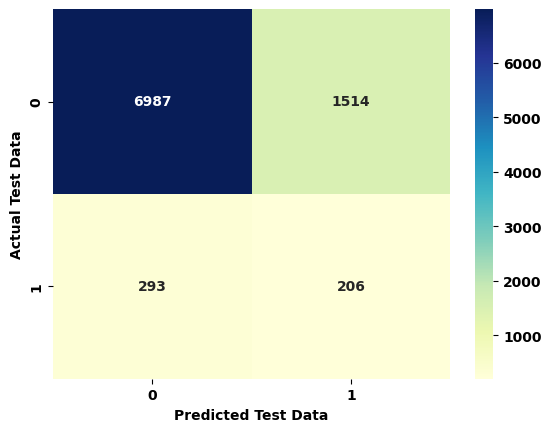

In [186]:
# Visualizing the conufusion matrix
y_pred_for_high_risk = np.round(y_pred_for_high_risk).astype(int)
conf_matrix = confusion_matrix(TEST_Y, y_pred_for_high_risk)
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Actual Test Data")
plt.xlabel("Predicted Test Data")

In [187]:
# Generating the classification report
print("The Classification Report for model:\n", classification_report(TEST_Y, y_pred_for_high_risk))

The Classification Report for model:
               precision    recall  f1-score   support

       False       0.96      0.82      0.89      8501
        True       0.12      0.41      0.19       499

    accuracy                           0.80      9000
   macro avg       0.54      0.62      0.54      9000
weighted avg       0.91      0.80      0.85      9000



# Conclusion based on the Classification Report

<p>
In this classification report, the model demonstrates a high precision for predicting the negative class (False), with a value of 0.96. This indicates that when the model predicts an instance as negative, it is correct around 96% of the time. However, the precision for the positive class (True) is notably lower at 0.12, suggesting that the model's predictions for the positive class are less reliable.
</p>
<p>
The accuracy of the model is reported at 0.80, indicating that it correctly classifies 80% of the instances in the dataset. While this seems reasonable, it's essential to consider the class imbalance, particularly in cases like this where the negative class dominates.
</p>
<p>
Overall, the classification report suggests that the model performs well in correctly identifying instances of the negative class but struggles with precision in predicting the positive class. This imbalance is also reflected in the macro-average and weighted-average values, which are lower compared to the precision and recall of the classes</p>